# Solveur d'équations différentielles.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## I. Schémas explicites à pas constant.

### Schéma d'Euler explicite.


On implémente Euler explicit.

In [11]:
def solve_euler_explicit(f, x0 : np.ndarray, dt, to, tf):
    T = []
    X = []                                                #liste des vecteurs x
    X.append(x0)
    T.append(to)
    for i in range(1,int((tf-to)//dt)):
        X.append(X[i-1] + dt * f(T[i-1], X[i-1])) # a priori f à été définie de R^n vers R^n
        T.append(i*dt)
    return (T, X)


On teste sur une fonction a priori de $R^n$ vers $R^n$

In [12]:
def f(t, x):
    return (- 1/(1+t**2) * x)

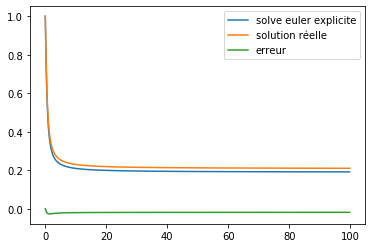

In [21]:
T, X = solve_euler_explicit(f, 1, 0.1, 0, 100)
Y = [np.exp(-np.arctan(t)) for t in T]
Z = [x-y for x, y in zip(X, Y)]
#et en superposant les courbes:
plt.plot(T, X)
plt.plot(T, Y)
plt.plot(T, Z)
plt.legend(("solve euler explicite", "solution réelle", "erreur"))
plt.show()


#### Illustration de la convergence.
On s'intéresse à $\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert$

On le trace en fonction du pas de temps dt. On trace une droite qui majore cette quantité (en tout cas pour dt assez grand pour que les erreurs liées à la représentation des nombres en machine n'intervienne pas).

On trace de plus une droite  y = Cv * dt pour Cv arbitraire.


[]

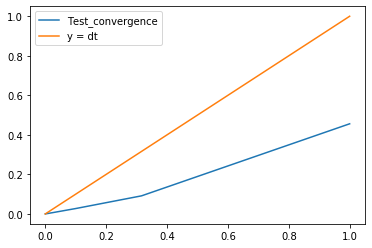

In [104]:
def test_convergence_f_dt(f, x0, dt, to, tf):
    T, X = solve_euler_explicit(f, x0, dt, to, tf)
    Y = [np.exp(-np.arctan(t)) for t in T]
    return(max((abs(Y[i] - X[i]) for i in range(len(T)))))

Test_convergence = []
DT = [10**(- 0.5*i) for i in range(13)] #dt varie de 1 à 10^-6
for dt in DT:
    Test_convergence.append(test_convergence_f_dt(f, 1, dt, 0, 10))
plt.plot(DT, Test_convergence, label = 'Test_convergence')

# comparaison avec une droite
Droite = [1 * dt for dt in DT]
plt.plot(DT, Droite, label = "y = dt")
plt.legend()
plt.plot()

On remarque que pour Cv = 10, on a bien un shéma convergent d'ordre 1, si on considère que l'erreur pour dt <= 0.01 est du aux erreurs d'arrondis de la machine.

On peut vérifier l'ordre de convergence en traçant $ln(\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert)$ en fonction de $ln(dt)$

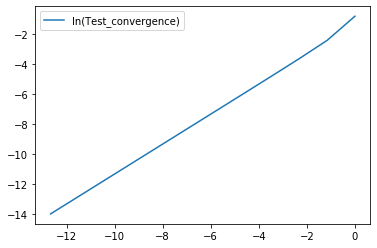

In [101]:
ln_DT = [np.log(dt) for dt in DT]
ln_Test_convergence = [np.log(e) for e in Test_convergence]
plt.plot(ln_DT, ln_Test_convergence, label = 'ln(Test_convergence)')
plt.legend()
plt.show()

On obtient bien une droite de pente 1.

### Schéma d'ordre 2 - Méthode de Heun.


f étant $C^1$, on a montré en exercice que le schéma est convergent d'ordre 2.

In [22]:
def solve_Heun_explicit(f, x0 : np.ndarray, dt, to, tf):
    T = []
    T.append(to)
    X = []
    X.append(x0)
    for i in range(1, int((tf-to)/dt)): 
        T.append(i * dt)
        k1 = f(T[i-1], X[i-1])
        k2 = f(T[i-1], X[i-1] + k1*dt)
        X.append(X[i-1] + dt/2 * (k1 + k2))
    return(T, X)
    

On applique cette méthode pour la même fonction.

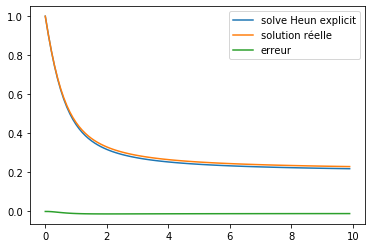

In [24]:
T, X = solve_Heun_explicit(f, 1, 0.1, 0, 10)
Y = [np.exp(-np.arctan(t)) for t in T]
Z = [x-y for x, y in zip(X, Y)]
#et en superposant les courbes:
plt.plot(T, X, label = 'solve Heun explicite')
plt.plot(T, Y, label = 'solution réelle')
plt.plot(T, Z, label = 'erreur')
plt.legend()
plt.show()

On remarque que l'erreur est plus petite qu'avec la méthode Euler explicite. Cependant, il reste toujours une erreur qu'on ne peut pas supprimer. On définit une nouvelle fonction test_convergence:

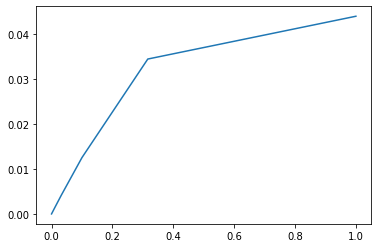

In [26]:
def test_convergence_2_f_dt(f, x0, dt, to, tf):
    T, X = solve_Heun_explicit(f, x0, dt, to, tf)
    Y = [np.exp(-np.arctan(t)) for t in T]
    return(max((abs(Y[i] - X[i]) for i in range(len(T)))))

Test_convergence_2 = []
DT = [10**(- 0.5*i) for i in range(13)]   #dt varie de 1 à 10^-6
for dt in DT:
    Test_convergence_2.append(test_convergence_2_f_dt(f, 1, dt, 0, 10))
plt.plot(DT, Test_convergence_2)
plt.show()

On trace de même  $ln(\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert)$ en fonction de $ln(dt)$

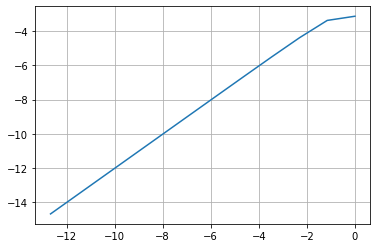

In [30]:
ln_DT = [np.log(dt) for dt in DT]
ln_Test_convergence_2 = [np.log(e) for e in Test_convergence_2]
plt.plot(ln_DT, ln_Test_convergence_2)
plt.grid()
plt.show()

Sur cette fonction, on ne peut pas mettre en évidence le fait que l'erreur est majorée par $ c_{v} \Delta _t^{2} $.
Mais a priori pour une autre fonction, on peut avoir une erreur plus importante mais toujours majorée par $ c_{v} \Delta _t^{2} $

## II. Développement mathématique.

### 1)
On choisit comme condition initiale : $$x^j = x(t_j)$$
D'après le théorème de Peano, f étant $C^{1}$ donc continue, il existe un voisinage de tj pour lequel le problème de Cauchy (f, xj) admet admet une solution x.

On a $$e^{j+1} = x^j - x^{j+1} + \displaystyle \int_{t_j}^{t_{j+1}} f(s,x(s)) \, \mathrm{d}s$$

Or f(s,x(s)) est la dérivée de x en s, donc l'intégrale se simplifie :

$$\Rightarrow e^{j+1} = x^j - x^{j+1} + x(t_{j+1}) - x(t_j)$$
$$= x(t_{j+1}) - x^{j+1}$$
$$= x(t_{j} + dt_j) - (x^{j} + dt_{j}f(t_j,x^j))$$

Par un développement de Taylor à l'odre 2 en $dt_j$ :

$$e^{j+1} = x(t_j) + dt_{j}f(t_j,x^j) + \frac{(dt_j)^2}{2}f'(t_j,x(t_j)) + o(dt^2) - x^j - dt_{j}f(t_j,x^j)$$
$$= \frac{(dt_j)^2}{2}f'(t_j,x(t_j)) + o(dt^2)$$
$$= \frac{(dt_j)^2}{2}\frac{f(t_{j+1},x(t_{j+1}))-f(t_j,x(t_j))}{dt_j} +  o(dt^2)$$
Sachant que la limite quand $dt_j$ tend vers 0 de $\frac{f(t_{j+1},x(t_{j+1}))-f(t_j,x(t_j))}{dt_j}$ est $f'(t_j,x(t_j))$.

On veut maintenant se ramener en $(t_{j+1},x^{j+1})$ plutôt qu'en $(t_{j+1},x(t_{j+1}))$.

On a $$f(t_{j+1},x(t_{j+1})) = f(t_{j+1},x(t_j) + dt_{j}f(t_j,x^j) + O(dt^2))$$
$$= f(t_{j+1},x^{j+1} + O(dt^2))$$
$$= f(t_{j+1},x^{j+1}) + \partial_{x}f(t_{j+1},x^{j+1})O(dt^2)$$


Puis comme f est $C^{1}$, $\partial_{x}f(t_{j+1},x^{j+1})$ est bornée sur un segment.

Donc $$e^{j+1} = dt_j\frac{f(t_{j+1},x^{j+1})-f(t_j,x^j)}{2} + O(dt^3)$$

Et on passe ensuite à la norme pour avoir le résultat souhaité

### 2)
Montrons que $||e^{j+1}|| = O(\Delta t^2)$ .

En utilisant $f(t_{j+1}, x^{j+1}) - f(t_j, x^j) = \Delta t \frac{d}{dt}f(t_j, x^j) + o(\Delta t)= O(\Delta t)$ car f est $C^1$ sur un segment donc  $ \frac{d}{dt}f $ est bornée entre $t_j$ et $t_{j+1}$.

D'où $||e^{j+1}|| = \frac{\Delta t}{2}  ||(f(t_{j+1}, x^{j+1}) - f(t_j, x^j))|| + o(\Delta t^2) = O(\Delta t^2)$

On peut en déduire une expression possible pour le pas de temps.
Il s'agit d'estimer le pas de temps pour chaque point $x_j$ afin de majorer l'erreur.

D'après les résultats précédents, $e^{j+1}$ varie en $\Delta t^2$ $e^{j+1}$est proportionnel à $\Delta t^2$, en première approximation à l'ordre 2.

Donc on a $\Delta t$ proportionnel à $(e^{j+1})^{\frac{1}{2}}$ 
    
La méthode doit avoir pour tolérance $Tol_{abs}$ sur l'erreur. On peut donc prendre, pour le même rapport de proportionalité k:
<center>$\Delta t_{new} = k*(Tol_{abs})^\frac{1}{2}$
    
<center>D'où : $\frac{\Delta t_{new}}{\Delta t} = (\frac{Tol_{abs}}{e^{j+1}})^\frac{1}{2}$
    
Ainsi  $\Delta t_{new} = \Delta t (\frac{Tol_{abs}}{e^{j+1}})^\frac{1}{2}$

# III. Euler explicite à pas variable.


Nous étudions maintenant une fonction  à pas variable. L'idée est, avant de stocker un nouveau point t, x dans une liste définitive, de calculer des point intermédiaires grâce aux deux résultats montrés précedemment, et ce jusqu'à ce que le temps total parcouru dans cette étape soit supérieur ou égal à une limite arbitraire dtmax. On complète en une dernière étape intermédiaire pour retomber sur un point éloigné de dtmax du précédent point stocké; on stocke ce nouveau point. 
Dans la boucl intermédiaire, il y a deux sécurité: on ne veux pas que dt calculé soit trop petit (pour des raisons de performances de l'algorithme), et on veut être sûr de calculer au mois un point intermédiaire.


On recopie la fonction du notebook. 

In [41]:
from numpy import *

In [64]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)    #à chaque passage on augmente ti de dt, dt
            x_back = x_next - dt * f(x_next)
            
            #On calcule Tolabs / norm(e^(j+1)), sachant que dans le cade le calcul est simplifié, il y a un x_next qui part
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)          
            
            
            dt = 0.9 * dt * sqrt(ratio_abs_error)                   #on calcule Delta tnew avec une norme de sécurité 0.9
            
            # si dt < dtmin, c'est que dtmin est trop petit pour avoir la précision demandée.
            if dt < dtmin:
                raise ValueError("Time step below minimum")             
                
            # Ici l'idée est d'être sûrs qu'on calcule au moins un point intermédiaire avant de stocker une nouvelle 
                #valeur. C'est un gage de précision.    
            elif dt > dtmax/2:
                dt = dtmax/2
                
                
            t, ti, x = t_next, ti_next, x_next
        # ici on sort de la boucle, on a donc le temps ti le plus proche possible de dtmax. On veut par contre placer comme 
        # nouveau point x_next celui qui correspond à t-next(précédent) + dtmax. On finalise donc avec un Euler classique 
        # entre t    
        
       
        dt2DT = dtmax - ti  # time left to dtmax:
         
        # On prépare les valeurs à ajouter aux listes définitives, on réinitialise ti_next
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x) 
        
        
        
        ts = vstack([ts,t_next])                                 #On concatène
        xs = vstack([xs,x_next])                                  
        t, ti, x = t_next, ti_next, x_next                       #t et x sont les nouveaux points de départ, on réinitialise ti
    return (ts, xs)

On applique la nouvelle méthode à notre fonction:

In [65]:
def g(x):
    return -x

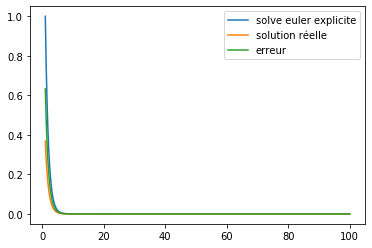

In [67]:
T, X = solve_ivp_euler_explicit_variable_step(g, 1, 1, 100)
Y = [np.exp(-t) for t in T]
Z = [x-y for x, y in zip(X, Y)]
#et en superposant les courbes:
plt.plot(T, X)
plt.plot(T, Y)
plt.plot(T, Z)
plt.legend(("solve euler explicite", "solution réelle", "erreur"))
plt.show()

On a changé de fonction car cette fois ci on utilise une fonction autonome (qui ne dépend pas de t) pour définir le problème de Cauchy. 

On remarque alors que l'erreur est ici bien amoindrie par rapport aux autres méthodes utilisées plus haut. L'algorithme d'adaptation de pas est ici plus adapté au problème.